<a href="https://colab.research.google.com/github/Abdul-Mannan-17/Machine-Learning-Models/blob/main/Upper_confidence_bound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Upper Confidence Bound (UCB)

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the dataset

In [2]:
dataset = pd.read_csv('/content/Ads_CTR_Optimisation.csv')

## Implementing UCB

In [3]:
import math
N = 10000
d = 10
ads_selected = []
numbers_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0
for n in range(0, N):
  ad = 0
  max_uppar_bound = 0
  for i in range(0, d):
    if(numbers_of_selections[i] > 0):
      average_reward = sums_of_rewards[i] / numbers_of_selections[i]
      delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
      uppar_bound = average_reward + delta_i
    else:
      uppar_bound = 1e400
    if (uppar_bound > max_uppar_bound):
      max_uppar_bound = uppar_bound
      ad = i
  ads_selected.append(ad)
  numbers_of_selections[ad] = numbers_of_selections[ad] + 1
  reward = dataset.values[n, ad]
  sums_of_rewards[ad] = sums_of_rewards[ad] + reward
  total_reward = total_reward + reward

## Visualising the results

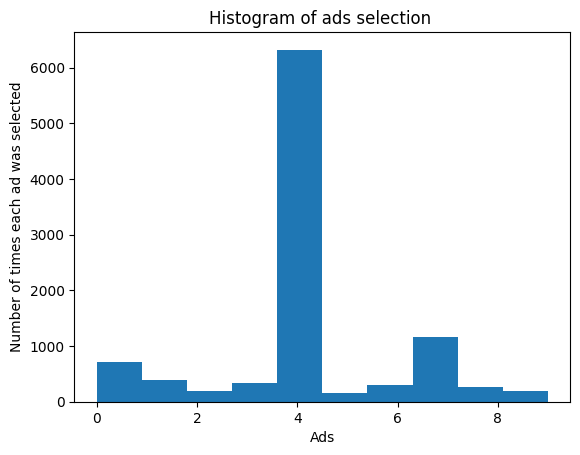

In [6]:
plt.hist(ads_selected)
plt.title('Histogram of ads selection ')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()